In [1]:
# Import default_timer to compute durations
from timeit import default_timer as timer
Debut=timer() # start time
import numpy as np  
import pandas as pd  
from glob import glob
from IPython.display import display 
import matplotlib.pyplot as plt 

# I. Loading Dataset 

In [86]:
# loading datasets(these datasets are the outputs of the signal processing pipeline )  label 1: walking/ 2: walking upstairs 
df = pd.read_csv('walking_upstairs.csv')

In [88]:
df.activity_Id.value_counts()

1.0    1720
2.0    1542
Name: activity_Id, dtype: int64

# II. Datasets Exploration and Exploratory Visualizations

## II.1. Datapoints number per each tuple (user,activity) function:

In [89]:
# This function returns a table includes the number of 
# windows per each tuple(user_id , activity id) included in the dataset 

def num_row_user_act(Df):
    
    user_Ids=sorted(Df['user_Id'].unique()) # extracting and sorting unqiue user ids 
    activity_Ids=sorted(Df['activity_Id'].unique()) # extracting and sorting unqiue activity ids 
    act_columns=['Activity '+str(int(Id)) for Id in activity_Ids ] # defining column names used in output table
    
    if len(activity_Ids)==7: # adapting column names in case the function deals with dataset type III
        act_columns=act_columns[0:6]+['P_Transitions'] 
    
    users_index=['User '+ str(int(Id)) for Id in user_Ids] # defining rows names used in output table
    
    # counting the number of windows per each tuple(user_id,activity_id)
    # store these values in 2D numpy array
    data=np.array([ [len(Df[(Df["user_Id"]== user_ID) &(Df["activity_Id"]==activity_ID)]) 
               for activity_ID in activity_Ids ] for user_ID in user_Ids])
    
    # Create a pandas dataframe from the array above
    win_per_act_per_user=pd.DataFrame(data = data,columns=act_columns,index=users_index)
    
    
    return win_per_act_per_user # returns the dataframe

## II.2. Visualizing Activities Distribution:

In [90]:

##################################################################################
# This function returns the weights activity and visualize the distribution of a column
# This function will be applied only to target columns
def visualize_column(Df,column):
    
    labels= sorted(Df[column].unique()) # extracting and sorting activity unique ids
    Als_dict={ key: len(Df[Df[column]==key]) for key in labels} # counting the number of windows per activity
    data=[Als_dict[key] for key in labels] # sorting these numbers
    
    weights=np.array(data)/float(np.array(data).sum()) # calculating weights of each activity
    
    columns=["Activity "+str(int(key)) for key in labels] # defining columns of weights' table
    
    Df_weights=pd.DataFrame(data=None,columns=columns)# defining an empty dataframe with column names
    Df_weights.loc['Weights']=weights # appending weights row
    
    print("_____ The weights of each activity _____")
    display(Df_weights) # displying weights table
    print("")
    plt.bar(columns,data) # ploting activity distribution
    plt.xlabel('Activity Labels') # set X axis info
    plt.ylabel('Number of Data points') # set Y axis info
    plt.title('Number of Data points per activity') # set the figure's title
    plt.show() # showing the figure

## Data Exploration 

shape:  (3262, 642)
The first 3 rows


,t_body_acc_mean()_X,t_body_acc_mean()_Y,t_body_acc_mean()_Z,t_body_acc_std()_X,t_body_acc_std()_Y,t_body_acc_std()_Z,t_body_acc_mad()_X,t_body_acc_mad()_Y,t_body_acc_mad()_Z,t_body_acc_max()_X,...,f_body_gyro_Jerk_Mag_kurtosis(),angle0(),angle1(),angle2(),angle3(),angle4(),angle5(),angle6(),activity_Id,user_Id
0,-0.003063,-0.005871,-0.007785,0.213300,0.150128,0.142624,0.192211,0.109890,0.099260,0.493074,...,88.511854,1.703255,2.195341,1.780995,0.848343,0.233660,1.801400,1.607796,1.0,1.0
1,-0.015425,-0.007429,-0.009191,0.243140,0.172391,0.131174,0.274473,0.142598,0.113235,0.479038,...,89.520181,2.302005,2.372435,0.860824,2.006079,0.239895,1.809026,1.598483,1.0,1.0
2,-0.005302,0.013971,-0.001888,0.236827,0.171370,0.131003,0.244644,0.122479,0.085416,0.553056,...,87.881983,2.158042,0.808123,0.419085,3.032780,0.237324,1.805810,1.603222,1.0,1.0




Description of the 10 first features:


,t_body_acc_mean()_X,t_body_acc_mean()_Y,t_body_acc_mean()_Z,t_body_acc_std()_X,t_body_acc_std()_Y,t_body_acc_std()_Z,t_body_acc_mad()_X,t_body_acc_mad()_Y,t_body_acc_mad()_Z,t_body_acc_max()_X
count,3262.000000,3262.000000,3262.000000,3262.000000,3262.000000,3262.000000,3262.000000,3262.000000,3262.000000,3262.000000
mean,0.000139,-0.000377,0.000228,0.234333,0.166700,0.138642,0.234267,0.153848,0.127300,0.583148
std,0.011053,0.009078,0.009496,0.048317,0.034169,0.040221,0.066242,0.039664,0.038629,0.138952
min,-0.042141,-0.038424,-0.047545,0.093769,0.072696,0.061657,0.070769,0.057136,0.044450,0.206821
25%,-0.007348,-0.006058,-0.005113,0.200637,0.142844,0.111342,0.186936,0.125905,0.100574,0.489822
50%,0.000164,-0.000313,-0.000154,0.228898,0.161362,0.132518,0.227286,0.148334,0.120695,0.575403
75%,0.007568,0.005261,0.005691,0.263655,0.187145,0.159761,0.271507,0.176320,0.147690,0.668828
max,0.036378,0.036071,0.045893,0.406887,0.341042,0.353751,0.528570,0.320932,0.364321,1.032814


Number of windows per user and per each activity:


,Activity 1,Activity 2
User 1,95,53
User 2,59,48
User 3,58,59
User 4,60,52
User 5,56,47
User 6,57,51
User 7,57,51
User 8,47,41
User 9,52,49
User 10,53,47


_____ The weights of each activity _____


,Activity 1,Activity 2
Weights,0.527284,0.472716


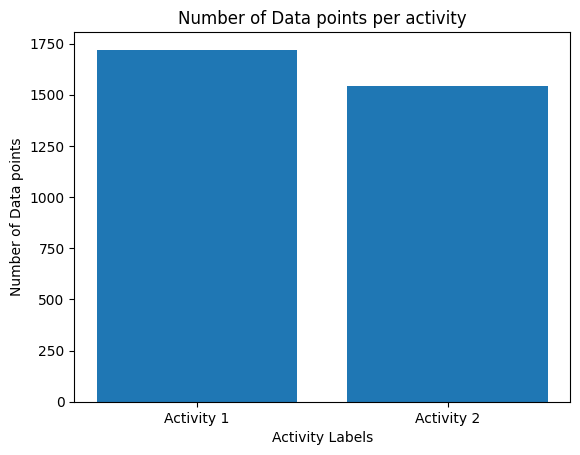

In [91]:
print('shape: ', df.shape)
print("The first 3 rows")
display(df.iloc[0:3]) # display the first 3 rows
print("")    
print("")
print("Description of the 10 first features:")
display(df.describe()[df.columns[0:10]]) # statistics of the first ten time domain features
Stats= num_row_user_act(df)# generate number of windows per each tuple (user,activity)
print("Number of windows per user and per each activity:")
display(Stats)# display the table
visualize_column(df,"activity_Id") # visualize activity distribution of the dataset 

# III. Data Preprocessing:

##  Features Scaling

In [92]:
#################################################################################
def scaling_array(oneD_signal):
    # inputs: 1D numpy array (one column)
    maximum=oneD_signal.max() # maximum of the column
    minimum=oneD_signal.min() # min value of the column
    Difference=float(maximum-minimum) # max-min
    # scaling formula: 2 * (x_i-minimum)/(maximum -minimum)
    # apply the scaling formula to each value in the column
    scaled_signal=np.array([((float(oneD_signal[i])-minimum)/float(Difference))*2 -1 for i in range(len(oneD_signal))])
    
    #return the scaled array
    return scaled_signal

def scaling_DF(data_frame):
    # input : pandas dataframe (clean datasets type I or II)
    columns=data_frame.columns# column names
    # apply the scaling function to each feature columns only
    scaled_array=np.apply_along_axis(scaling_array,0,np.array(data_frame[columns[:-2]]))
    
    # buid the scaled dataset
    scaled_df=pd.DataFrame(data=scaled_array,columns=columns[:-2])
    
    # the user and activity ids columns
    scaled_df['activity_Id']=np.array(data_frame['activity_Id'])
    scaled_df['user_Id']=np.array(data_frame['user_Id'])
    
    return scaled_df # return the scaled dataset

###################################################################################

shape:  (3262, 642)
The first 3 rows


,t_body_acc_mean()_X,t_body_acc_mean()_Y,t_body_acc_mean()_Z,t_body_acc_std()_X,t_body_acc_std()_Y,t_body_acc_std()_Z,t_body_acc_mad()_X,t_body_acc_mad()_Y,t_body_acc_mad()_Z,t_body_acc_max()_X,...,f_body_gyro_Jerk_Mag_kurtosis(),angle0(),angle1(),angle2(),angle3(),angle4(),angle5(),angle6(),activity_Id,user_Id
77,-0.003063,-0.005871,-0.007785,0.213300,0.150128,0.142624,0.192211,0.109890,0.099260,0.493074,...,88.511854,1.703255,2.195341,1.780995,0.848343,0.233660,1.801400,1.607796,1.0,1.0
78,-0.015425,-0.007429,-0.009191,0.243140,0.172391,0.131174,0.274473,0.142598,0.113235,0.479038,...,89.520181,2.302005,2.372435,0.860824,2.006079,0.239895,1.809026,1.598483,1.0,1.0
79,-0.005302,0.013971,-0.001888,0.236827,0.171370,0.131003,0.244644,0.122479,0.085416,0.553056,...,87.881983,2.158042,0.808123,0.419085,3.032780,0.237324,1.805810,1.603222,1.0,1.0




Description of the 10 first features:


,t_body_acc_mean()_X,t_body_acc_mean()_Y,t_body_acc_mean()_Z,t_body_acc_std()_X,t_body_acc_std()_Y,t_body_acc_std()_Z,t_body_acc_mad()_X,t_body_acc_mad()_Y,t_body_acc_mad()_Z,t_body_acc_max()_X
count,3262.000000,3262.000000,3262.000000,3262.000000,3262.000000,3262.000000,3262.000000,3262.000000,3262.000000,3262.000000
mean,0.076943,0.021464,0.022555,-0.102165,-0.299382,-0.472876,-0.285723,-0.266766,-0.481977,-0.088789
std,0.281534,0.243734,0.203254,0.308617,0.254664,0.275399,0.289393,0.300715,0.241527,0.336449
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.113780,-0.131066,-0.091771,-0.317394,-0.477185,-0.659806,-0.492498,-0.478617,-0.649082,-0.314763
50%,0.077581,0.023179,0.014388,-0.136881,-0.339168,-0.514807,-0.316224,-0.308569,-0.523274,-0.107544
75%,0.266174,0.172823,0.139493,0.085126,-0.147004,-0.328271,-0.123035,-0.096393,-0.354489,0.118669
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Number of windows per user and per each activity:


,Activity 1,Activity 2
User 1,95,53
User 2,59,48
User 3,58,59
User 4,60,52
User 5,56,47
User 6,57,51
User 7,57,51
User 8,47,41
User 9,52,49
User 10,53,47


_____ The weights of each activity _____


,Activity 1,Activity 2
Weights,0.527284,0.472716


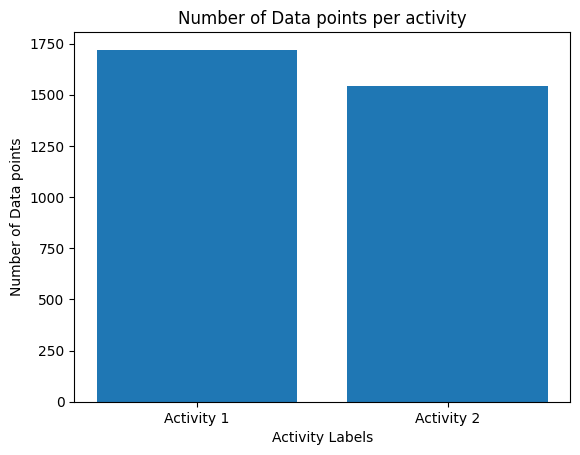

In [47]:
scaled_type_I=scaling_DF(df)

print('shape: ', scaled_type_I.shape)
print("The first 3 rows")
display(df.iloc[0:3]) # display the first 3 rows
print("")    
print("")
print("Description of the 10 first features:")
display(scaled_type_I.describe()[scaled_type_I.columns[0:10]]) # statistics of the first ten time domain features
Stats= num_row_user_act(scaled_type_I)# generate number of windows per each tuple (user,activity)
print("Number of windows per user and per each activity:")
display(Stats)# display the table
visualize_column(scaled_type_I,"activity_Id") # visualize activity distribution of the dataset 

# IV. Train-Test Datasets

## IV.1. Train-Test Datasets creation

### Unique Users Ids used for training and testing

In [93]:
# volunteersids used for training
train_users =[1,3,5,6,7,8,10,11,14,15,27,17,21,29,30,16,19,20,22,23,25,]

# volunteers ids used for testing
test_users = [2,4,9,12,13,26,18,28,24,]

### Creating train and test datasets

In [94]:
def create_training_testing_data(scaled_Df,train_users,test_users,typ):
    # inputs:
    #        scaled_DF : pandas dataframe already scaled
    #       train_users: list of integers contains train user ids 
    #       train_users: list of integers contains test user ids 
    #       typ        : integer from 1 to 3 (depending on the dataset type)
    
    # select rows related to train users ids store them in numpy array
    array_train =np.array([np.array(scaled_Df.iloc[i]) 
                           for i in range(len(scaled_Df)) if int(scaled_Df['user_Id'].iloc[i]) in train_users])
    # select rows related to test users ids store them in numpy array
    array_test  =np.array([np.array(scaled_Df.iloc[i]) 
                           for i in range(len(scaled_Df)) if int(scaled_Df['user_Id'].iloc[i]) in test_users])
    
    # columns names
    columns=scaled_Df.columns
    
    # build train and test dataframes from numpy arrays above
    Df_train= pd.DataFrame(data= array_train,columns=columns)
    Df_test = pd.DataFrame(data= array_test,columns=columns)
    
    
    # train features dataframe
    Df_train_features= Df_train[columns[:-2]]
    # train labels dataframe
    Df_train_labels  = Df_train[columns[-2:-1]]
    # train user id labels dataframe
    Df_train_users   = Df_train[columns[-1]]
    
    # test features dataframe
    Df_test_features= Df_test[columns[:-2]]
    # test labels dataframe
    Df_test_labels  = Df_test[columns[-2:-1]]
    # test user id labels dataframe
    Df_test_users   = Df_test[columns[-1]]
    
    # 2D numpy array : train features
    X_train =np.array(Df_train_features)
    
    # 2D numpy array : test features
    X_test  =np.array(Df_test_features)
    
    # 1D numpy array : train labels
    y_train= np.array(Df_train_labels['activity_Id'])
    
    # 1D numpy array : test labels
    y_test = np.array(Df_test_labels ['activity_Id'])
   
    print("")
    print("______________________________ Train features & labels info:______________________________________")
    print("")
    visualize_column(Df_train,'activity_Id') # visualize activity distribution of train dataframe
    print("")
    print("______________________________Test features & labels info:______________________________________")
    print("")
    visualize_column(Df_test,'activity_Id') # visualize the activity distribution of the test dataframe
    
    return  [X_train, X_test, y_train, y_test] # return train and test numpy arrays

In [95]:
# dictionary will contain train and test files of each dataframe type
train_test_files_dic={}


______________________________ Train features & labels info:______________________________________

_____ The weights of each activity _____


,Activity 1,Activity 2
Weights,0.533129,0.466871


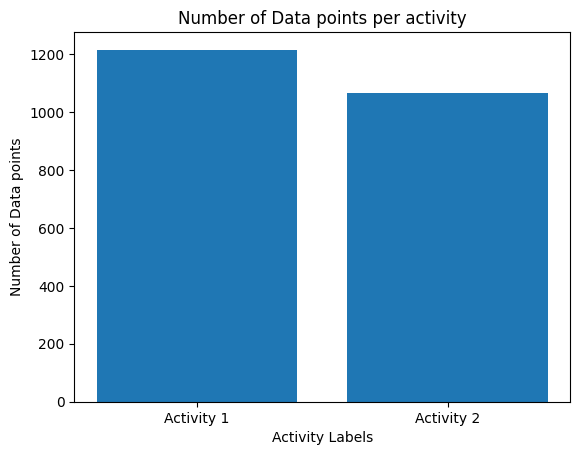


______________________________Test features & labels info:______________________________________

_____ The weights of each activity _____


,Activity 1,Activity 2
Weights,0.513733,0.486267


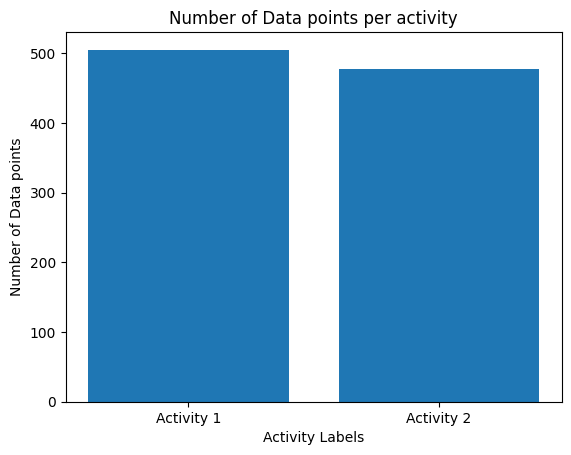

In [96]:
# apply create_training_testing_data to scaled dataset type I
[X_1_train, X_1_test, y_1_train, y_1_test] = create_training_testing_data(scaled_type_I,train_users,test_users,1)

In [97]:
# store train test files type I in the dictionary 
train_test_files_dic[1]=[X_1_train, X_1_test, y_1_train, y_1_test]

# V. Train-Test PipeLine

In [98]:
from sklearn.naive_bayes import GaussianNB as NB # import gaussian naive bayes classifier
from sklearn.tree import DecisionTreeClassifier as DTC # import decision tree classifier
from sklearn.linear_model import LogisticRegression as LR # import logistic regression classifier

from sklearn.metrics import accuracy_score as accuracy # import accuracy score
from sklearn.metrics import confusion_matrix as cm # import confusion matrix

# intialize models
Benchmark_model =NB()
Clf1=DTC(random_state=337)
Clf2=LR(random_state=337)

In [99]:
# Define the adpted confusion matrix
def full_confusion_matrix(Df): 
    # input: 
    #   Df : pandas dataframe, the contingency table resulted from the confusion matrix defined earlier as cm
    
    columns=Df.columns # activity names
    # add new columns containing detailed scores
    new_columns=list(columns)+['data points number','precision %','sensitivity %','specificity %']
    
    # create the index from the same old columns add an other row called total
    new_index=list(columns)+['Total']
    
    # intialize the confustion matrix dataframe
    new_Df=pd.DataFrame(data=None,columns=new_columns, index= new_index)
    # intilize values
    total_TP=0 # sum of true positives
    total_FN=0 # sum of false negatives
    total_data_points_number=0 # total number of datapoints
    
    for column in columns:
        
        TP=Df.loc[column][column] # extract true postives from the contingency table
        FN=Df.loc[column].sum()-TP # calculate FN(false negatives)
        FP=Df[column].sum()-TP # calculate FP(false positives)
        TN=(Df.sum()).sum()-TP-FN-FP # calculate TN(true negatives)
        class_data_points=TP+FN  # number of datapoints per activity
        # precision score in %
        precision= TP/float(TP+FP) * 100
        # Recall or sensitivity in %
        sensitivity= TP/float(TP+FN) *100
        # sepecificity score in %
        specificity=TN/float(TN+FP) * 100
        
        new_row =list(Df.loc[column])+[class_data_points,precision,sensitivity,specificity]# contenate new scores in one row
        new_Df.loc[column]=new_row # append the row to the dataframe
        
        # update intialized values
        total_data_points_number= total_data_points_number+class_data_points 
        total_TP=total_TP+TP
        total_FN=total_FN+FN
    
    # after iterting throw all activity types
    # the general accuracy of the model is:
    total_accuracy= total_TP/float(total_TP+total_FN) * 100
    
    # add total values to the dataframe
    new_Df.loc['Total'] [['data points number','precision %','sensitivity %','specificity %']]=['data points number='+str(total_data_points_number),'','','accuracy= '+str(total_accuracy)[0:6]+'%']
    new_Df.loc['Total'][columns]=['' for i in range(len(columns))]
    
    return new_Df # return the adapted confusion matrix
        

In [64]:
def train_predict(classifier, sample_size, X_train, X_test, y_train,  y_test,typ): 
    
    # inputs:
    #   classifier: the learning algorithm to be trained and predicted on
    #   sample_size: the size of samples (number) to be drawn from training set
    #   X_train: features training set
    #   y_train: Activity_number_ID training set
    #   X_test: features testing set
    #   y_test: Activity_number_ID testing set
    
    # Empty dictionary will include all dataframes and info related to training and testing.
    results = {}
    
    # Fitting the classifier to the training data using slicing with 'sample_size'
    start= timer() # Get start time
    classifier = classifier.fit(X_train[0:sample_size,:],y_train[0:sample_size])# fiting the classfier
    end = timer() # Get end time
    
    # Calculate the training time
    results['train_time'] = end-start
        
    # Get the predictions on the test set(X_test),
    # then get predictions on the first 3000 training samples(X_train) using .predict()
    start = timer() # Get start time
    predictions_test = classifier.predict(X_test) # predict
    predictions_train =classifier.predict(X_train[:3000,:])
    end = timer() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] =end-start
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy(y_train[:3000],predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy(y_test,predictions_test)
    
    # Adapting the confusion matrix shape to the type of data used
    if typ==1:
        confusion_matrix=cm(y_test, predictions_test, labels=[1,2], sample_weight=None) # 
        columns=['WK','WU']
        index=['WK','WU']
        
    if sample_size==len(X_train):# if 100% of training is achieved
        # apply the confusion matrix function to the last contingency table generated
        confusion_matrix_df=(pd.DataFrame(data=confusion_matrix,columns=columns,index=index)).pipe(full_confusion_matrix)
    else:# if not
        # create a dataframe from the contingency table
        confusion_matrix_df=pd.DataFrame(data=confusion_matrix,columns=columns,index=index)
        
    # Return the results
    return (results,confusion_matrix_df)

In [100]:
def train_test_report(classifier,dataset_type):
    # Inputs:
    #  classifier: model will be trained tested and evaluated on all sample sizes
    #  Dataset_type: "All"  or integers 1,2,3 
    # if "All" the classifier will be trained, tested and evaluated on all datasets
    # if integer 1, 2 or 3: the classifier the classifier will be trained, tested and evaluated on one dataset(I,II or III)
    
    if dataset_type!='All': # dataset type equal to 1 ,2 or 3
        # extract train and test files related to dataset type
        new_dic={dataset_type:train_test_files_dic[dataset_type]}
    
    else:# the model will be trained , tested and evaluted on all datasets
        new_dic=train_test_files_dic # import all train and test files
    
    for key in sorted(new_dic.keys()):# iterating throw dataset types
        clf=classifier # reintialize the classifier
        # adapt the dataset name switch the case
        
        files = new_dic[key] # copy train and test files related to the dataset type
        # create a temporal dictionary where train, test and evaluation results will be stored
        results = {}
        print("_____________________ Training and Testing______________________")
        print("")
        
        # copy train and test files
        X_train, X_test, y_train, y_test,= files[0], files[1], files[2], files[3]
        # extract the name of the classifier
        clf_name = clf.__class__.__name__
        
        # training started
        print("{} started training....".format(clf_name) )   
        
        results[clf_name] = {}
        # generate sample sizes
        samples_10 = int(len(X_train)/10) # 10%
        samples_50 = int(len(X_train)/2) # 50%
        samples_100 = int(len(X_train)) # 100%
        
        
        for i, samples in enumerate([samples_10, samples_50, samples_100]): # iterate throw each sample size
            print("...")
            if samples==len(X_train):# when 100% of training will be achieved
                # store results related to the classier and sample size in results dictionary
                # store the full confusion matrix
                results[clf_name][i],confusion_matrix = train_predict(clf, samples, X_train, X_test, y_train, y_test,key)
            else:# if not
                # store results related to the classier and sample size in results dictionary
                results[clf_name][i]= train_predict(clf, samples, X_train,X_test, y_train,  y_test,key)[0]

        print( "Success: {} Finished Training and Testing.".format(clf_name))
        print("")
        print ("________"+clf_name+" results:__________")
        print("")
        print("")
        print("Accuracy and duration per training size")
        # display train and test results
        display(pd.DataFrame(results[clf_name]).rename(columns={0:'10% of train', 1:'50% of train', 2:'100% of train'}))
        print("")
        print("Confusion Matrix Sensitivity and Recall when 100% of train is achieved")
        # display the full confusion matrix results
        display(confusion_matrix)
        print("____________________________________________________________________")
        print("")
        print("")

# VI. Model training

In [101]:
# training, testing and evaluating the benchmark model on all datasets
train_test_report(Benchmark_model,1)

_____________________ Training and Testing______________________

GaussianNB started training....
...
...
...
Success: GaussianNB Finished Training and Testing.

________GaussianNB results:__________


Accuracy and duration per training size


,10% of train,50% of train,100% of train
train_time,0.001722,0.008058,0.014737
pred_time,0.045122,0.037279,0.032212
acc_train,0.757350,0.841158,0.802545
acc_test,0.810783,0.837233,0.739573



Confusion Matrix Sensitivity and Recall when 100% of train is achieved


,WK,WU,data points number,precision %,sensitivity %,specificity %
WK,257,248,505,96.981132,50.891089,98.32636
WU,8,470,478,65.45961,98.32636,50.891089
Total,,,data points number=983,,,accuracy= 73.957%


____________________________________________________________________




- Decision Tree Classifier

In [102]:
# training, testing and evaluating Decision tree classifier on all datasets
train_test_report(Clf1,1)

_____________________ Training and Testing______________________

DecisionTreeClassifier started training....
...
...
...
Success: DecisionTreeClassifier Finished Training and Testing.

________DecisionTreeClassifier results:__________


Accuracy and duration per training size


,10% of train,50% of train,100% of train
train_time,0.011576,0.164390,0.795602
pred_time,0.004738,0.006207,0.005895
acc_train,0.667837,0.875823,1.000000
acc_test,0.673449,0.866734,0.924720



Confusion Matrix Sensitivity and Recall when 100% of train is achieved


,WK,WU,data points number,precision %,sensitivity %,specificity %
WK,489,16,505,89.396709,96.831683,87.866109
WU,58,420,478,96.330275,87.866109,96.831683
Total,,,data points number=983,,,accuracy= 92.472%


____________________________________________________________________




- Logistic Regression Classifier

In [103]:
# training, testing and evaluating Logistic Regression  classifier on all datasets
train_test_report(Clf2,1)

_____________________ Training and Testing______________________

LogisticRegression started training....
...
...
...
Success: LogisticRegression Finished Training and Testing.

________LogisticRegression results:__________


Accuracy and duration per training size


d:\hanyang_workspace\paper\xai_paper\venv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



,10% of train,50% of train,100% of train
train_time,0.022434,0.058569,0.073673
pred_time,0.003334,0.005140,0.003175
acc_train,0.881966,0.994735,1.000000
acc_test,0.908444,0.978637,0.984741



Confusion Matrix Sensitivity and Recall when 100% of train is achieved


,WK,WU,data points number,precision %,sensitivity %,specificity %
WK,504,1,505,97.297297,99.80198,97.07113
WU,14,464,478,99.784946,97.07113,99.80198
Total,,,data points number=983,,,accuracy= 98.474%


____________________________________________________________________




## Explanation

In [104]:
# Test data :  X_1_test(numpy ndarray), X_1_test_df (pandas dataframe)
X_1_test_df = pd.DataFrame(X_1_test , columns = scaled_type_I.columns[:-2])
X_1_test_df

,t_body_acc_mean()_X,t_body_acc_mean()_Y,t_body_acc_mean()_Z,t_body_acc_std()_X,t_body_acc_std()_Y,t_body_acc_std()_Z,t_body_acc_mad()_X,t_body_acc_mad()_Y,t_body_acc_mad()_Z,t_body_acc_max()_X,...,f_body_gyro_Jerk_Mag_meanFreq(),f_body_gyro_Jerk_Mag_skewness(),f_body_gyro_Jerk_Mag_kurtosis(),angle0(),angle1(),angle2(),angle3(),angle4(),angle5(),angle6()
0,-0.296016,-0.013388,0.093797,-0.473486,-0.494025,-0.731207,-0.501100,-0.691462,-0.571606,-0.255545,...,0.627461,0.622939,0.610287,0.685679,0.412035,0.752250,-0.110595,-0.177627,0.429640,-0.404737
1,-0.160111,0.378468,0.339591,-0.351799,-0.384876,-0.720732,-0.470545,-0.647510,-0.582944,-0.255545,...,0.876516,0.581451,0.575267,0.390952,-0.816046,0.750698,-0.648634,-0.172124,0.433243,-0.423117
2,0.264971,-0.136265,0.220886,-0.491891,-0.245581,-0.625660,-0.492732,-0.484637,-0.420639,-0.511667,...,0.549107,0.551276,0.550764,-0.482523,-0.317001,0.445586,-0.496570,-0.177551,0.429247,-0.411057
3,0.084281,-0.366039,-0.106641,-0.584899,-0.271816,-0.633320,-0.582384,-0.285340,-0.373732,-0.597432,...,0.496741,0.367164,0.344585,-0.204235,0.854011,-0.865968,-0.499509,-0.190670,0.417542,-0.402754
4,-0.051376,0.022639,-0.121771,-0.566098,-0.475503,-0.672190,-0.585673,-0.501411,-0.455384,-0.499440,...,0.662718,0.440694,0.441619,0.392631,0.448433,-0.734441,-0.845773,-0.195186,0.412797,-0.409886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,-0.547586,-0.028075,0.316053,0.140825,-0.257070,-0.516474,-0.333687,-0.156027,-0.650253,0.325267,...,0.645667,0.640351,0.635644,0.716920,-0.719858,-0.395458,-0.492413,0.205459,0.455565,0.278877
979,0.250695,-0.167260,0.128843,0.257220,-0.270385,-0.427342,-0.153217,-0.216981,-0.764637,0.325267,...,0.742676,0.695288,0.696942,-0.427682,-0.973323,0.023537,0.622005,0.213208,0.448822,0.292763
980,0.538635,-0.417570,0.036415,0.125586,-0.340735,-0.473765,-0.211656,-0.271058,-0.760054,-0.022714,...,0.871396,0.542413,0.537361,-0.670055,0.346885,0.622826,0.118705,0.178006,0.412159,0.287366
981,0.007050,-0.185929,0.104278,-0.038806,-0.261046,-0.475381,-0.328083,-0.172808,-0.753416,-0.195046,...,0.218543,0.470748,0.460067,0.077427,0.719949,-0.175191,0.440589,0.180699,0.392575,0.305938


In [105]:
y_1_test

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1.,
       1., 1., 1., 1., 1.

In [141]:
X_1_test_df.columns

Index(['t_body_acc_mean()_X', 't_body_acc_mean()_Y', 't_body_acc_mean()_Z',
       't_body_acc_std()_X', 't_body_acc_std()_Y', 't_body_acc_std()_Z',
       't_body_acc_mad()_X', 't_body_acc_mad()_Y', 't_body_acc_mad()_Z',
       't_body_acc_max()_X',
       ...
       'f_body_gyro_Jerk_Mag_meanFreq()', 'f_body_gyro_Jerk_Mag_skewness()',
       'f_body_gyro_Jerk_Mag_kurtosis()', 'angle0()', 'angle1()', 'angle2()',
       'angle3()', 'angle4()', 'angle5()', 'angle6()'],
      dtype='object', length=640)

### Explain with SHAP

d:\hanyang_workspace\paper\xai_paper\venv\lib\site-packages\shap\plots\_beeswarm.py:664: UserWarning:

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored



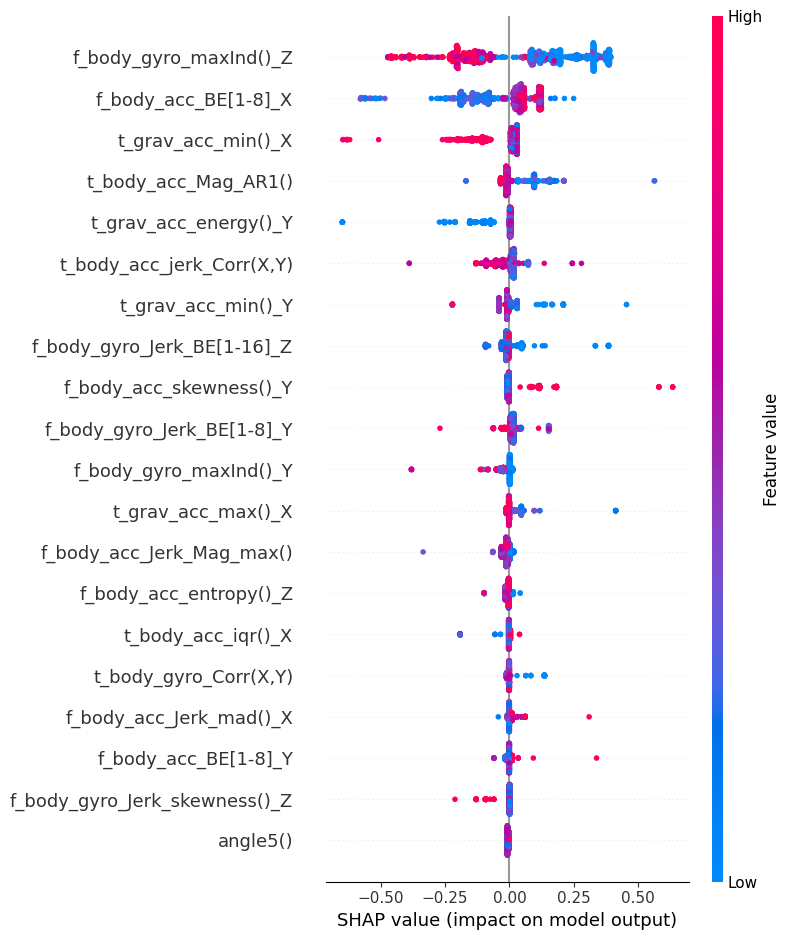

In [109]:
# code here 






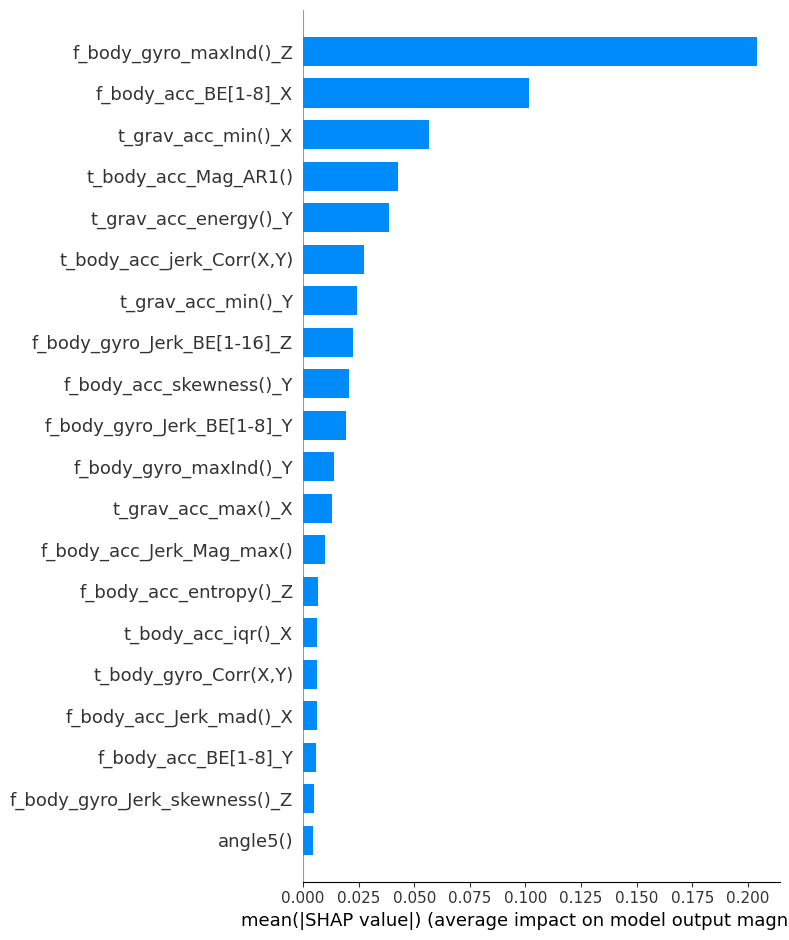

In [110]:
### code here 



### Explain with LIME

In [138]:
# code here 






selected index: 123
Prediction :  1.0
Actual :      [-0.04957672 -0.31074856 -0.07322186 -0.48992575 -0.47388421 -0.77169218
 -0.4206774  -0.31129662 -0.71763016 -0.56688634  0.00514927 -0.76662464
  0.70320829  0.58965798  0.73080109 -0.57277532 -0.72893839 -0.72320367
 -0.91522851 -0.3794682  -0.4205295  -0.71994794  0.44396831  0.37707794
  0.08301583  0.58001331 -0.48913926  0.44264989 -0.45339955  0.05604886
 -0.3542308   0.40420215 -0.24563009 -0.04546334 -0.04059734  0.11669632
  0.08234066  0.62466536  0.83040047  0.56857185  0.89787392  0.15958916
  0.64185228 -0.92663339 -0.85373252 -0.70626815 -0.91292361 -0.88934178
 -0.72778725  0.79115183  0.16166627  0.58476789  0.91625864  0.18434173
  0.63486896 -0.42949961  0.88178719 -0.93741288 -0.89590213 -0.91738142
 -0.87904895 -0.69681899  0.99749429  0.99122239  0.98642767 -0.82013659
  0.84125676 -0.86900333  0.90737321 -0.90275243  0.90601436 -0.91104828
  0.89945597 -0.77724351  0.7678401  -0.74987137  0.74945769 -0.89826344